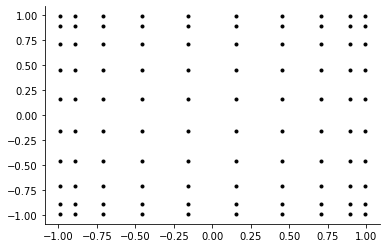

In [81]:
from approximation_auxiliary import get_chebyshev_nodes
from approximation_auxiliary import get_uniform_nodes

x = get_chebyshev_nodes(10)
y = get_chebyshev_nodes(10)
X, Y = meshgrid(x, y)  # grid of point


def plot_two_dimensional_grid():
    fig, ax = plt.subplots()
    for i in range(len(x)):
        ax.plot(X[i, :], Y[i, :], marker=".", color="k", linestyle="none")


plot_two_dimensional_grid()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from numpy import exp, arange
from pylab import meshgrid, cm, imshow, contour, clabel, colorbar, axis, title, show
from approximation_auxiliary import get_uniform_nodes, get_chebyshev_nodes

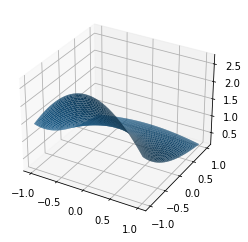

In [57]:
def test_function(x, y):
    return np.cos(x) / np.exp(y)


x_fit = get_chebyshev_nodes(50)
y_fit = get_chebyshev_nodes(50)
X_fit, Y_fit = meshgrid(x_fit, y_fit)
Z_fit = test_function(X_fit, Y_fit)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_surface(X_fit, Y_fit, Z_fit)

In [76]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


x_fit = get_chebyshev_nodes(100)
y_fit = get_chebyshev_nodes(100)
X_fit, Y_fit = meshgrid(x_fit, y_fit)  # grid of point
grid_fit = np.array(meshgrid(x_fit, y_fit)).T.reshape(-1, 2)
y = list()
for point in grid_fit:
    y.append(test_function(*point))

poly = PolynomialFeatures(degree=6)
X_fit = poly.fit_transform(grid_fit)
clf = LinearRegression().fit(X_fit, y)

# Now moving to evaluatiokn
x_eval = get_uniform_nodes(100)
y_eval = get_uniform_nodes(100)

Z_eval = np.tile(np.nan, (100, 100))
Z_true = np.tile(np.nan, (100, 100))

for i, x in enumerate(x_eval):
    for j, y in enumerate(y_eval):
        Z_eval[i, j] = clf.predict(poly.fit_transform([[y, x]]))[0]
        Z_true[i, j] = test_function(y, x)

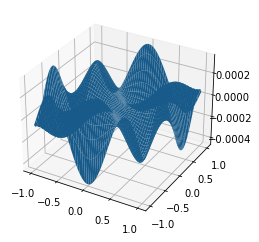

In [83]:
fig = plt.figure()
ax = fig.gca(projection="3d")
X_eval, Y_eval = meshgrid(x_eval, y_eval)  # grid of point
ax.plot_surface(X_eval, Y_eval, Z_eval - Z_true)
fig.savefig("test")